# Networks A 
---------------------------------------------

In [2]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
from matplotlib import pyplot as plt
import random
from ipywidgets import *
import numpy.linalg
from IPython.display import display
from IPython.core.display import HTML
from notebook.nbextensions import enable_nbextension 
%matplotlib inline

print('The libraries loaded successfully')

The libraries loaded successfully


This chapter introduces models of social networks and of queuing systems.

## Epidemics

The basic epidemiology model is that one infected person infects a random number of susceptible persons after one unit of time, and that number is distributed like some random variable $Y$.  The model assumes also that the infected people recover after one unit of time. Section 5.1 explains that if $R := E(Y) > 1$, then the expected number of infected people increases without bound and there is a positive probability that the number of infected people also grows without bound.  On the other hand, if $R < 1$, then the epidemy eventually fizzles out. 

In the stochastic model, if $X(n)$ is the number of infected people after $n$ units of time,

$$
E[X(n+1) \mid X(n)] = R X(n).
$$

A deterministic continous-time model of this epidemy is 

$$
x(t+1) = R x(t), t \geq 0.
$$

This section compares the deterministic and stochastic models. At first glance, it seems that both models should behave similarly.  It is indeed common to use a deterministic model in epidemiology.  However, a closer look reveals important differences.  We simulate the stochastic model for a few distributions of $Y$. In case (a), $Y = R$; in case (b), $Y = R/0.3$ with probability $0.3$ and $Y = 0$ otherwise; in case (c), $Y = 10R$ with probability $0.1$ and $Y = 0$ otherwise.  Note that $E[Y] = R$ in the three cases.


In [4]:
def dummy(Rd, Nd,cased):
    global R, N, case
    R, N, case = float(Rd), int(Nd), str(cased)

Rd = widgets.Dropdown(options=['0.8', '0.9', '1', '1.1','1.2','1.3','1.4','1.5'],value='1.1',description='N',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)','(c)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, Rd = Rd, Nd = Nd,cased=cased) 
display(z)

interactive(children=(Dropdown(description='N', index=3, options=('0.8', '0.9', '1', '1.1', '1.2', '1.3', '1.4…

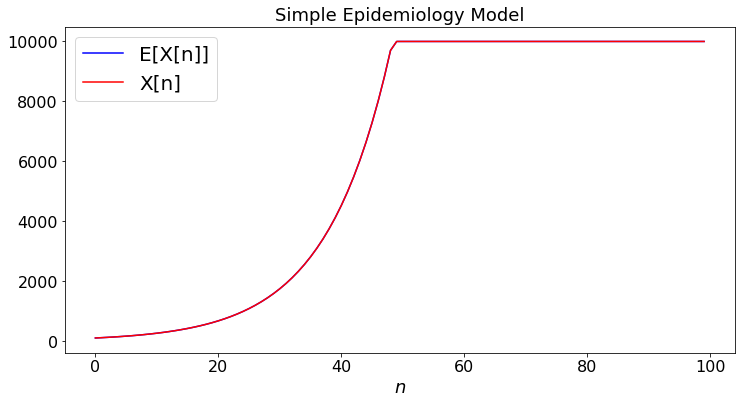

In [6]:
matplotlib.rcParams.update(params)

def discreteRV(x,p): # here x = [x[0],...,x[K-1]], p = [p[0], ..., p[K-1]]
    # returns a random value equal to x[k] with probability p[k]
    z = 0
    K = len(x)
    P = np.zeros(K)
    for k in range(K):
        P[k] = sum(p[:k]) # P[0] = p[0], p[1] = p[1], P[2] = p[0] + p[1], ..., P[K-1] = p[0] + ... + p[K-1] = 1
    U = np.random.uniform(0,1) # here is our uniform RV
    for k in range(1,K):
        found = False
        if U < P[k]:
            z = x[k-1]
            found = True
            break
    if not found:
        z = x[K-1]
    return z

def epidemiology1(case,R,N):
    if case == '(a)':
        x = [R]
        p = [1]
    elif case == '(b)':
        x = [0,R/0.3]
        p = [0.70,0.30]
    else:
        x = [0,10*R]
        p = [0.9,0.1]
    X = np.zeros(N)
    EX = np.zeros(N)
    X[0] = 100
    EX[0] = 100
    for n in range(N-1):
        EX[n+1] = min(10**4,EX[n]*R)
        if X[n] == 10**4:
            X[n+1] = 10**4
        else:
            if case == '(a)':
                X[n+1] = min(R*X[n],10**4)
            else:
                for m in range(int(X[n])):
                    X[n+1] += discreteRV(x,p)
                X[n+1] = min(X[n+1],10**4)
 
    plt.plot(EX, color='b',label="E[X[n]]") 
    plt.plot(X, color='r',label="X[n]")
    plt.legend()
    plt.xlabel("$n$")
    plt.title("Simple Epidemiology Model")
    
epidemiology1(case,R,N)

Not surprisingly, the stochastic model shows that $X[n]$ has a large variability that the deterministic model overlooks.  To explore this variability, we choose $R = 1.1$.  We simulate the process $100$ times and we plot the histogram of $X[15]$.

In [7]:
def dummy(cased):
    global case
    case = str(cased)

cased = widgets.ToggleButtons(options=['(a)', '(b)','(c)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, cased=cased) 
display(z)

interactive(children=(ToggleButtons(button_style='info', description='Case:', options=('(a)', '(b)', '(c)'), v…

The mean value E[X[15]] =  418


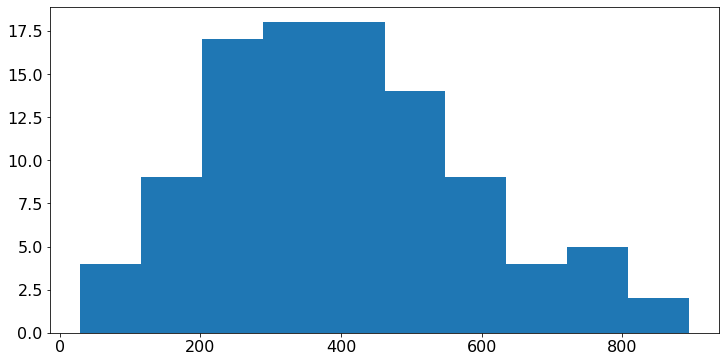

In [9]:
def epidemiology2(case,R,N):
    if case == '(a)':
        x = [R]
        p = [1]
    elif case == '(b)':
        x = [0,R/0.3]
        p = [0.70,0.30]
    else:
        x = [0,10*R]
        p = [0.9,0.1]
    X = np.zeros(N)
    EX = np.zeros(N)
    X[0] = 100
    EX[0] = 100
    for n in range(N-1):
        EX[n+1] = min(10**4,EX[n]*R)
        if X[n] == 10**4:
            X[n+1] = 10**4
        else:
            if case == '(a)':
                X[n+1] = min(R*X[n],10**4)
            else:
                for m in range(int(X[n])):
                    X[n+1] += discreteRV(x,p)
                X[n+1] = min(X[n+1],10**4)
    return X[N-1]

def epidemiology3(case):
    Z = np.zeros(100)
    for k in range(100):
        Z[k] = epidemiology2(case,1.1,16)
    print('The mean value E[X[15]] = ', round(100*(1.1)**15))
    plt.hist(Z);

epidemiology3(case)            

### Controlling the Epidemics

Assume that one tries to control the epidemics by imposing social distancing measures.  These measures reduce the value of $R$.  In our model, we introduce social distancing measures that reduce $R$ by a factor $2$ if we notice that $X[n]$ exceeds $1000$.  However, it takes four units of time for the measures to be implemented.  Consider the following stochastic model of this situation.  If $X[n-4] > 1000$, then each of the $X[n]$ infected people infect a random number of people equal to $4R$ with probability $0.125$ and to zero with probability $0.875$; if $X[n-4] < 1000$, then each of the $X[n]$ infected people infect a random number of people equal to $8R$ with probability $0.125$ and to zero with probability $0.875$.  We simulate $X[n]$ and we compare that evolution to the predictions of a deterministic model. Run the model a few times by changing the value of $N$ and observe the variability of the results.

In [11]:
def dummy(Nd):
    global N
    N = int(Nd)

Nd = widgets.Dropdown(options=['100', '150', '200', '250','300','350'],value='200',description='N',disabled=False)

z = widgets.interactive(dummy, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='N', index=2, options=('100', '150', '200', '250', '300', '350'), v…

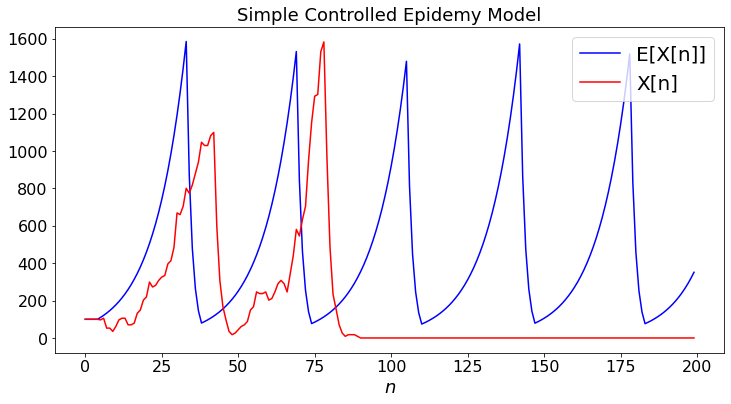

In [12]:
def epidemiology5(N):
    R = 1.1
    X = np.zeros(N)
    EX = np.zeros(N)
    for n in range(5):
        X[n] = 100
        EX[n] = 100
    for n in range(4,N-1):
        if EX[n-4] < 1000:
            EX[n+1] = min(10**4,EX[n]*R)
        else:
            EX[n+1] = min(10**4,EX[n]*R/2)
        if X[n] == 10**4:
            X[n+1] = 10**4
        else:
            if X[n-4] < 1000:
                for m in range(int(X[n])):
                    X[n+1] += discreteRV([0,8*R],[0.875, 0.125])
                X[n+1] = min(X[n+1],10**4)
            else:
                for m in range(int(X[n])):
                    X[n+1] += discreteRV([0,4*R],[0.875, 0.125])
                X[n+1] = min(X[n+1],10**4)

    plt.plot(EX, color='b',label="E[X[n]]") 
    plt.plot(X, color='r',label="X[n]")
    plt.legend()
    plt.xlabel("$n$")
    plt.title("Simple Controlled Epidemy Model")
    plt.show()

epidemiology5(N)

This example shows that predictions based on a determistic model can be very misleading.  More importantly, choosing control policies based on such predictions seems a bit dicey.  Thus, although feedback control makes systems more robust, the combination of randomness and delays can have lasting effects.

## Queueing Models

Here we explore a simple queuing network. We examine the suitability of such models for sudying communication networks. The key question is whether it is reasonable to assume that the service times of the same packet are independent in successive nodes and that the packet lengths are exponentially distributed.

The model is shown in the figure below.
![title](Figs/network.pdf)

There are two sources of packets: source 0 and source 1.  Packets of source 0 go through queues 0 and 1 whereas packets of source 1 go only through queue 1.  The queues are first-come, first-served and each has a single server. The packets arrive as independent Poisson processes with rates $\lambda_0$ and $\lambda_1$, respectively.  In **case (a)**, the packets have i.i.d. lengths that are **exponentially distributed with mean one**.  The transmission rates are equal to one in both queues.  Thus, a packet of length $L$ takes $L$ time units to be transmitted. We call this transmission time the *service time* of the packet in the queue. In a queuing model, one assumes that the service times are all independent.  In a communication model, a packet of stream A has the same service time in both queues, since its length does not change.  How different are these models?

### Packet Length Distribution

In the Internet, the lengths of packets are not exponentially distributed.  Typically, there maximum-length packets of $1500$ Bytes that carry bits from large files or audio/video streams, and minimum-length packets of about $100$ Bytes that carry acknowledgments of the large packets.  In **case (b)** we assume that the packet lengths are **equal to $0.1$ with probability $0.5$ and to $1.9$ with probability $0.5$**.  The average length is equal to $1$, as before.

Quite remarkably, the independence and exponential apporximations yield very good approximations. This was conjectured in the 1960s by Leonard Kleinrock.  

In [15]:
def dummy(L0d, L1d,cased):
    global L0, L1, case
    L0, L1, case = float(L0d), float(L1d), str(cased)

L0d = widgets.Dropdown(options=['0.05', '0.1', '0.15', '0.2','0.25','0.3','0.35','0.4'],value='0.2',description='$\lambda_0$',disabled=False)
L1d = widgets.Dropdown(options=['0.05', '0.1', '0.15', '0.2','0.25','0.3','0.35','0.4'],value='0.2',description='$\lambda_1$',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, L0d = L0d, L1d = L1d,cased=cased) 
display(z)

interactive(children=(Dropdown(description='$\\lambda_0$', index=3, options=('0.05', '0.1', '0.15', '0.2', '0.…

The average delay for source 0 is  2.88
The average delay when the service times are independent and exponentially distributed is  2.917


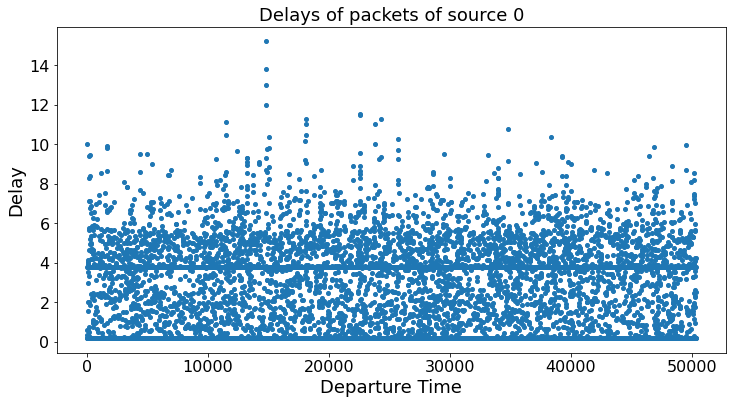

In [17]:
# We write an event-driven simulation.  
# The code is object-oriented.  There are three types of ojects: network, sources, and queues.
# It is easy to modify this code to accommodate an arbitrary topology 
#  and different distributions or even multiple priorities.

def main(L0,L1,case): # Li is the rate of arrivals of source i
    global source_list, queue_list
    N = 50000 # N is the number of events
    source_list = []
    queue_list = []
    # First build the network -  One could generalize by giving a topology
    Csource(0,0,L0,case) # generate source 0 attached to queue 0 with rate L
    Csource(1,1,L1,case) # generate source 1 attached to queue 1 with rate L
    Cqueue(0,1)  # generate queue 0 attached to queue 1
    Cqueue(1,-1)  # generate queue 1 attached to exit from network
    Network = Cnetwork() # define the network
    for n in range(N):
        Network.find_next_event()
        Network.process_event(Network.nextEvent)        
    depTimes = []
    delays = []
    for item in queue_list[1].exits:
        if item[0] == 0:
            depTimes.append(item[1])
            delays.append(item[2])
    plt.ylabel("Delay")
    plt.xlabel("Departure Time")
    plt.title("Delays of packets of source 0")
    plt.scatter(depTimes,delays)    
    print('The average delay for source 0 is ', round(sum(delays)/len(delays),3))    
    D = 0
    D += 1/(1 - source_list[0].rate) # delay in first queue
    D += 1/(1 - source_list[0].rate - source_list[1].rate) # delay in second queue    
    print('The average delay when the service times are independent and exponentially distributed is ', round(D,3))
    
    
class Csource():
    def __init__(self,ID, nextQueue, rate,case):
        self.ID = ID
        self.nextGenerationTime = np.random.exponential(1/rate)
        self.rate = rate
        self.packet = []
        self.nextQueue = nextQueue
        source_list.append(self)
    def generate(self,time,case):
        if case == '(a)':
            length = np.random.exponential(1)
        else:
            length = discreteRV([0.1,1.9],[0.5,0.5])
        self.packet = [self.ID,time,length] # [source.ID, generation time, length]
        self.nextGenerationTime = time + np.random.exponential(1/self.rate)
        queue_list[self.nextQueue].arrival(time,self.packet)
        
class Cqueue():
    def __init__(self, ID, nextQueue):
        self.ID = ID
        self.state = []  # list of packets
        self.exits = [] # list of [source.ID, departure time, delay]
        self.nextQueue = nextQueue
        self.nextDepartureTime = 0
        queue_list.append(self)
    def arrival(self,time,packet): # packet = [source.ID, generation time, length]
        self.state.append(packet)
        if len(self.state) == 1: # packet just arrived in empty queue
            self.nextDepartureTime = time + self.state[0][2] # length of new packet
    def departure(self,time):
        packet = self.state[0]
        del self.state[0]
        if self.state != []:
            self.nextDepartureTime = time + self.state[0][2]
        if self.nextQueue == -1: # -1 is a generic name for 'leaving the network'
            self.exits.append([packet[0],time,time - packet[1]])
        else:
            queue_list[self.nextQueue].arrival(time,packet)
            
class Cnetwork():
    def __init__(self):
        self.nextEvent = []
        self.sources = source_list
        self.queues = queue_list
        self.numberSources = len(source_list)
        self.numberQueues = len(queue_list)
        Network = self
        
    def find_next_event(self): # event = ['Generation' or 'Departure', s or q, when]
        self.nextEvent = ['Generation',0,source_list[0].nextGenerationTime]
        for s in range(1,self.numberSources):
            if source_list[s].nextGenerationTime < self.nextEvent[2]:
                self.nextEvent = ['Generation',s,source_list[s].nextGenerationTime]
        for q in range(self.numberQueues):
            if queue_list[q].state != []:
                if queue_list[q].nextDepartureTime < self.nextEvent[2]:
                    self.nextEvent = ['Departure',q,queue_list[q].nextDepartureTime]
                
    def process_event(self,event):
        time = event[2]
        if event[0] == 'Generation':
            s = event[1]
            source_list[s].generate(time,case)
        else: # departure
            q = event[1]
            queue_list[q].departure(time)
            
main(L0,L1,case)